

# Bike Sharing Analysis with Ford GoBike Data
# by Norah Alotaibi



## Introduction

> This project has two parts that demonstrate the importance and value of data visualization techniques in the data analysis process. In the first part, I will use Python visualization libraries to systematically explore a selected dataset, starting from plots of single variables and building up to plots of multiple variables. In the second part, you will produce a short presentation that illustrates interesting properties, trends, and relationships that I discovered in my selected dataset. The primary method of conveying my findings will be through transforming your exploratory visualizations from the first part into polished, explanatory visualizations.


In [2]:
# import all packages needs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import glob
import os

%matplotlib inline

In [3]:
# read dataset
df = pd.read_csv('2017-fordgobike-tripdata.csv')

In [4]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


In [5]:
df.sample(30)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
281343,736,2017-10-03 18:10:13.5310,2017-10-03 18:22:29.6430,58,Market St at 10th St,37.776619,-122.417385,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,915,Customer,1985.0,Male
68907,592,2017-12-06 09:09:43.0840,2017-12-06 09:19:36.0430,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,23,The Embarcadero at Steuart St,37.791464,-122.391034,1396,Subscriber,1974.0,Male
320019,2000,2017-09-22 12:29:40.3380,2017-09-22 13:03:01.0470,7,Frank H Ogawa Plaza,37.804562,-122.271738,7,Frank H Ogawa Plaza,37.804562,-122.271738,2565,Customer,1981.0,Male
507897,487,2017-07-11 17:17:39.6410,2017-07-11 17:25:46.8390,6,The Embarcadero at Sansome St,37.804770,-122.403234,22,Howard St at Beale St,37.789756,-122.394643,806,Subscriber,1988.0,Male
6503,1335,2017-12-28 07:37:59.4890,2017-12-28 08:00:14.6150,71,Broderick St at Oak St,37.773063,-122.439078,13,Commercial St at Montgomery St,37.794231,-122.402923,1923,Subscriber,1994.0,Male
71147,514,2017-12-05 17:47:45.8390,2017-12-05 17:56:20.7030,22,Howard St at Beale St,37.789756,-122.394643,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,3325,Subscriber,1979.0,Male
323210,209,2017-09-21 16:36:29.3820,2017-09-21 16:39:58.8410,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,64,5th St at Brannan St,37.776754,-122.399018,1569,Subscriber,1950.0,Male
213488,516,2017-10-23 17:16:12.2670,2017-10-23 17:24:49.1800,80,Townsend St at 5th St,37.775306,-122.397380,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2005,Subscriber,1975.0,Male
100270,589,2017-11-27 17:48:33.1940,2017-11-27 17:58:22.4190,36,Folsom St at 3rd St,37.783830,-122.398870,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,2015,Subscriber,1983.0,Female
380017,957,2017-09-05 08:28:44.6010,2017-09-05 08:44:41.7290,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,8,The Embarcadero at Vallejo St,37.799953,-122.398525,269,Subscriber,1987.0,Male


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 59.5+ MB


In [7]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,453159.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079,1980.404787
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959,10.513488
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000,1886.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000,1974.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000,1983.000000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000,1988.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000,1999.000000


In [8]:
df.duplicated().sum()

0

In [9]:
len(df)

519700


## Exploration Data 


### Research Question 1  what are the age range more use Ford GoBike ?

In [51]:
#Set visualization style
sns.set_style('whitegrid')
sns.set_context("talk")

In [52]:
#Filter data to include reasonable member age range
df['member_age'] = 2018-df['member_birth_year']

In [53]:
# Check age distrubition
df['member_age'].describe(percentiles = [.1, .2, .3, .4, .5, .6, .7, .75, .8, .9, .95])

count    453159.000000
mean         37.595213
std          10.513488
min          19.000000
10%          26.000000
20%          29.000000
30%          31.000000
40%          33.000000
50%          35.000000
60%          38.000000
70%          41.000000
75%          44.000000
80%          46.000000
90%          53.000000
95%          57.000000
max         132.000000
Name: member_age, dtype: float64

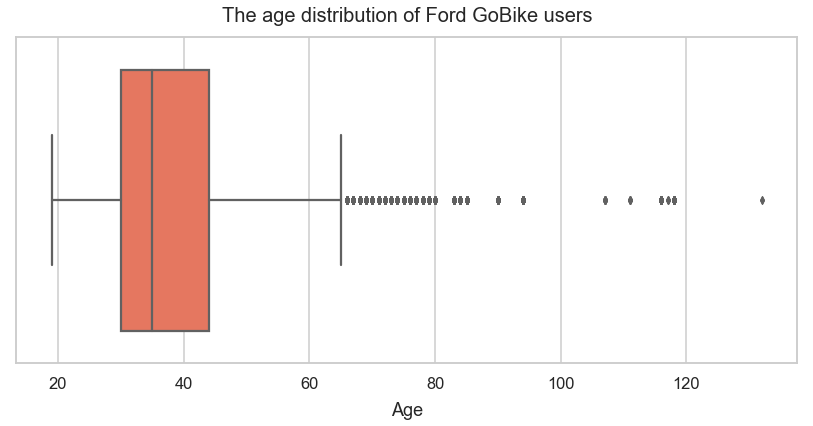

In [54]:
plt.figure(figsize=(14,6))
sns.boxplot(x='member_age', data=df, palette='Reds', orient='h')
plt.title("The age distribution of Ford GoBike users", fontsize=20, y=1.03)
plt.xlabel("Age", fontsize=18, labelpad=10)
plt.savefig('The age distribution of Ford GoBike users.png');

### Result 1 in the chart shows the age of Ford GoBike users are between 30 to 44.  

### Research Question 2 When are most trips taken in terms of month of the year?  

In [55]:
#Generate new fields for date from start_time and end_time
df['start_time']=pd.to_datetime(df['start_time'])
df['end_time']=pd.to_datetime(df['end_time'])

In [56]:
df['start_time_date']=df['start_time'].dt.date
df['end_time_date']=df['end_time'].dt.date

In [57]:
df['start_time_year_month']=df['start_time'].map(lambda x: x.strftime('%Y-%m'))
df['end_time_year_month']=df['end_time'].map(lambda x: x.strftime('%Y-%m'))

In [58]:
df['start_time_year_month_renamed'] = df['start_time'].dt.strftime('%y' + '-' + '%m')

In [59]:
df['start_time_year']=df['start_time'].dt.year.astype(int)
df['end_time_year']=df['end_time'].dt.year.astype(int)

In [60]:
df['start_time_month']=df['start_time'].dt.month.astype(int)
df['end_time_month']=df['end_time'].dt.month.astype(int)

In [61]:
df['start_time_hour_minute']=df['start_time'].map(lambda x: x.strftime('%H-%m'))
df['end_time_hour_minute']=df['end_time'].map(lambda x: x.strftime('%H-%m'))

In [62]:
df['start_time_hour']=df['start_time'].dt.hour
df['end_time_hour']=df['end_time'].dt.hour

In [63]:
df['start_time_weekday']=df['start_time'].dt.weekday_name
df['end_time_weekday']=df['end_time'].dt.weekday_name

In [65]:
df['start_time_weekday_abbr']=df['start_time']
df['end_time_weekday_abbr']=df['end_time']

In [66]:
#Generate a new field for member age group from member_age_bin
df['member_age_bins'] = df['member_age'].apply(lambda x: '10 - 20' if 10<x<=20
                                                  else '20 - 30' if 20<x<=30
                                                  else '30 - 40' if 30<x<=40
                                                  else '40 - 50' if 40<x<=50
                                                  else '50 - 60' if 50<x<=60
                                                  else x)

In [67]:
#Generate minutes for trip duration from duration_sec
df['duration_min'] = df['duration_sec']/60

In [72]:
#Generate new fields for distance
def distance(origin, destination):
    """
    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

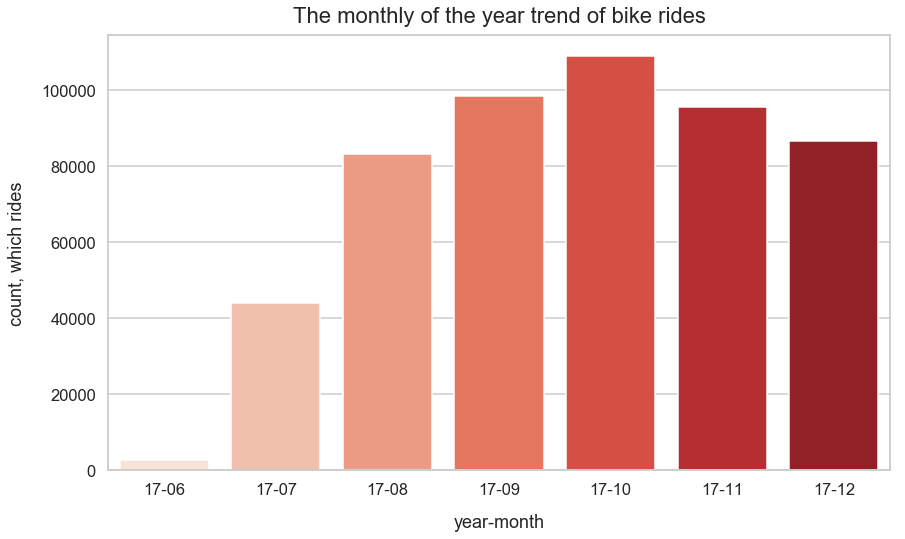

In [73]:
plt.figure(figsize=(14,8))
sns.countplot(x='start_time_year_month_renamed', palette="Reds", data=df.sort_values(by='start_time_year_month_renamed'))
plt.title('The monthly of the year trend of bike rides', fontsize=22, y=1.015)
plt.xlabel('year-month', labelpad=16)
plt.ylabel('count, which rides', labelpad=16)
ax = plt.gca()
plt.savefig('The monthly of the year trend of bike rides.png')

### Result 2 in the graph shows that in the october are more user use Ford GoBike. However, in the june only about 1000 user.

### Research Question 3 what are the age range for bike rides in the months ?  

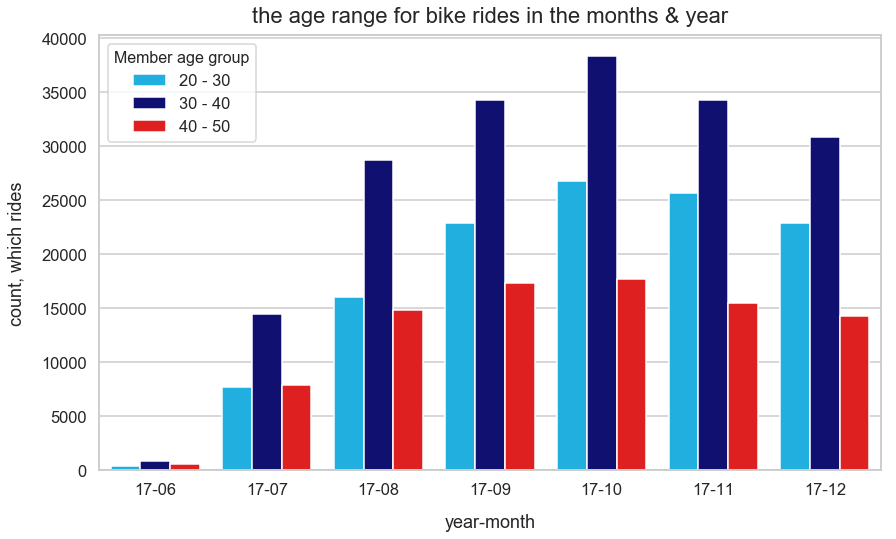

In [35]:
plt.figure(figsize=(14,8))
my_palette = {'20 - 30': 'deepskyblue', '30 - 40': 'navy', '40 - 50': 'red'}
ax = sns.countplot(x='start_time_year_month_renamed', hue='member_age_bins', palette=my_palette, data=df[df['member_age_bins'].isin(['20 - 30', '30 - 40', '40 - 50'])].sort_values(by=['start_time_year_month_renamed', 'member_age_bins']))
plt.title('the age range for bike rides in the months & year', fontsize=22, y=1.015)
plt.xlabel('year-month', labelpad=16)
plt.ylabel('count, which rides', labelpad=16)
leg = ax.legend()
leg.set_title('Member age group',prop={'size':16})
ax = plt.gca()
plt.savefig('the age range for bike rides in the months & year.png');

### Result 3 in the chart illustrates that age range from 30 to 40 more use Ford GoBike, whereas the 40 to 50 age less use of Ford GoBike. all the ages are use Ford GoBike in october more than others months   

### Research Question 4 what are the percentage of all bike rides per gender?

In [36]:
gender_df = df.groupby('member_gender').agg({'bike_id':'count'})

In [37]:
gender_df['perc'] = (gender_df['bike_id']/gender_df['bike_id'].sum())*100

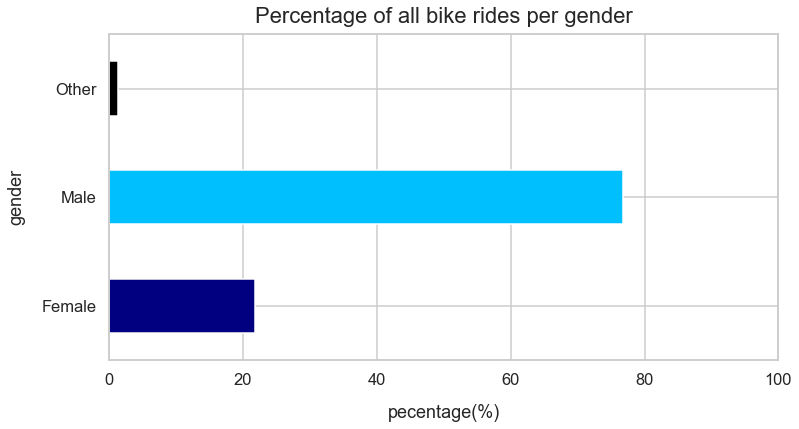

In [38]:
new_color = ['navy', 'deepskyblue', 'black']
gender_df['perc'].plot(kind='barh', color=new_color, figsize=(12,6))
plt.title('Percentage of all bike rides per gender', fontsize=22, y=1.015)
plt.ylabel('gender', labelpad=16)
plt.xlabel('pecentage(%)', labelpad=16)
plt.xticks(rotation=360)
plt.xlim(0,100)
plt.savefig('Percentage of all bike rides per gender.png');

### Result 4 in the graph shows that male use Ford GoBike more than female by 78%. 

### Research Question 5 Does the above depend on if a user is a subscriber or customer?  

In [39]:
user_type_df = df.groupby(["start_time_year_month_renamed", "user_type"]).size().reset_index()

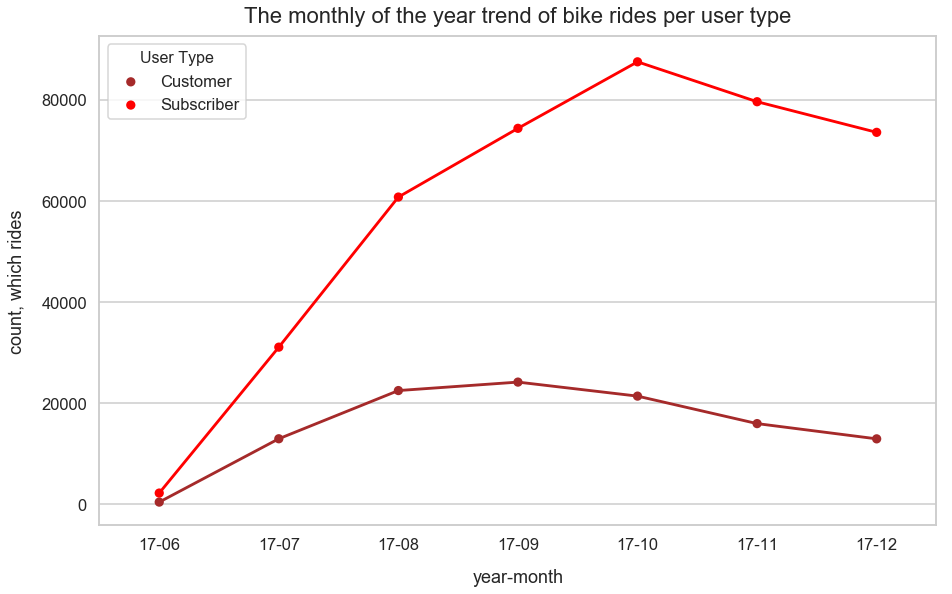

In [40]:
plt.figure(figsize=(15,9))
my_palette = {'Subscriber':'red', 'Customer':'brown'}
ax = sns.pointplot(x='start_time_year_month_renamed', y=0, hue='user_type', palette=my_palette, scale=.7, data=user_type_df)
plt.title('The monthly of the year trend of bike rides per user type', fontsize=22, y=1.015)
plt.xlabel('year-month', labelpad=16)
plt.ylabel('count, which rides', labelpad=16)
leg = ax.legend()
leg.set_title('User Type',prop={'size':16})
ax = plt.gca()
plt.savefig('The monthly of the year trend of bike rides per user type.png');

### Result 5 the subscriber users use Ford GoBike more than customer during the year. And, the subscriber users use Ford GoBike more in october.